<h1><center>Do Masks Help in the Prevention of Covid-19?</center></h1>
<h3><center>Gaurav Arora</center></h3>
<hr>

## Introduction:

   Covid-19 is a highly infectious coronavirus that has led to 1.5 million deaths worldwide as the time of writing. Some of the symptoms of this virus includes fatigue, fever, coughing and pneumonia. A full list of symptoms can be found [here](https://www.cdc.gov/coronavirus/2019-ncov/symptoms-testing/symptoms.html). Over the past year (2020), Covid-19 has put the world at stand still. This is because Covid-19 has a very high infectious rate and a high hospitalization rate (4%). Many hospitals across the world were overwhelmed with the influx of patients who had the virus and could no longer support a sustainable number of patients within their hospitals. As such the governments across the world took multiple actions to curb the rate of infection. Some of these include stay at home orders, curfews, outdoor only shopping/dining, and mask wearing. All of these had varying degrees of effectiveness depending on the country. 

   I’m going into this project completely blind in how effective these procedures are. Also, it’s important to note that I can’t account for all possible variables of how effective these policies work. In my project I’m only testing for mask wearing vs cases. However, there could be a multitude of factors that affect the results. Some could be population density, rate of testing and other prevention methods. All variables are not independent of each other and it’s difficult to account for this bias.
   
   In the United States, The CDC recommended the use of wearing a mask in April but has faced criticism. Part of it was because they reversed their stance on mask wearing and some believing that mask wearing isn’t an effective method of preventing the spread of covid-19. My project is supposed to determine how effective the results of mask wearing is. However, it is important to state that this is not a scientific study where most outside variables can be eliminated besides those being tested. A study that directly checks for the effectiveness of mask wearing can be found [here](https://www.cdc.gov/coronavirus/2019-ncov/more/masking-science-sars-cov2.html).
   
   <hr>


## Data Collection:

   For this project I imported multiple classes such as sqlite3,pandas,matplotlib and numpy to help organize my data. Each of these libaries helps to create a sustainable dataframe to read and to interpret the data presented.
   
   ### US State Covid Data
   The first piece of data I needed for my project was the daily rate of covid cases in the United States. The New York Times have been publishing their [data](https://github.com/nytimes/covid-19-data) since covid first arrived in the United States. Their data includes the national, state and county covid cases across the country. I will only be using the state covid cases since it will be easier for a single person to organize. A national covid chart will not create enough diversity to find out if masks prevent covid-19. A county level can be used but will be hard to organize especially with merging different data sets as will be shown later.
   
   The state data includes 5 pieces of info
   1. The date to notify when the cases were recorded
   2. The state where the cases are occurring
   3. Fips, which are a "standard geographic identifier" according to the New York Times
   4. The cases which are the TOTAL amount of cases of Covid-19 that have occurred in the state
   5. The deaths which are the TOTAL amount of deaths due to covid-19 that have occurred in the state
   
To implement the data into python. I used pandas' [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). This allows the data with it's appopriate columns and rows to be implemented into python from a csv file.

In [142]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.max_rows", 15, "display.max_columns", 30)

data = pd.read_csv("us-states.csv")
data


,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
15079,2020-12-01,Virginia,51,240063,4093
15080,2020-12-01,Washington,53,174969,2927
15081,2020-12-01,West Virginia,54,48818,758
15082,2020-12-01,Wisconsin,55,416365,3628


### Mask Wearing Data
The Second piece of data is the rate of wearing a mask per state in this country. The following [data](https://delphi.cmu.edu/covidcast/?sensor=chng-smoothed_adj_outpatient_cli&level=county&date=20201215&signalType=value&encoding=color&mode=overview&region=42003) is from Carnegie Mellon University's COVIDcast. COVIDcast includes many pieces of information such as covid related doctor visits, hospitalization rates and surveys on people's behaviors. One of these behaviors includes mask wearing from a facebook survey. Other behaviors include dining and staying at home.

I chose to only use the mask related survey provided. It's important to note that this survey was conducted on facebook and may provide bias data in the end.

 The mask data includes multiple pieces of info
   1. geo_value which is the state where the information is taken place
   2. The signal which is "smoothed_wearing_mask." The site states this is information on the "estimated percentage of people who wore a mask at all or most times in the past 5 days
   3. time-value, which is the date when this data is recorded 
   4. value which is the percentage of people wearing a mask
   5. stderr is the standard deviation of the value
   6. sample size is amount of people questioned
   7. geo_type is state
   8. data_source is the facebook survey.

The methodology for conducting the surveys can be found [here](https://delphi.cmu.edu/covidcast/surveys/). I used read_csv just like above to get the data

In [143]:
pd.set_option("display.max_rows", 15, "display.max_columns", 30)

data2 = pd.read_csv("mask.csv")
data2

,Unnamed: 0,geo_value,signal,time_value,issue,lag,value,stderr,sample_size,geo_type,data_source
0,0,ak,smoothed_wearing_mask,2020-09-08,2020-12-09,92,78.712871,4.093374,100.0000,state,fb-survey
1,1,al,smoothed_wearing_mask,2020-09-08,2020-12-09,92,87.874513,1.706219,366.0096,state,fb-survey
2,2,ar,smoothed_wearing_mask,2020-09-08,2020-12-09,92,84.801745,2.388057,226.0004,state,fb-survey
3,3,az,smoothed_wearing_mask,2020-09-08,2020-12-09,92,86.713975,1.380068,604.8998,state,fb-survey
4,4,ca,smoothed_wearing_mask,2020-09-08,2020-12-09,92,91.576645,0.545422,2593.0126,state,fb-survey
...,...,...,...,...,...,...,...,...,...,...,...
5191,46,vt,smoothed_wearing_mask,2020-12-18,2020-12-19,1,95.054352,0.715220,919.0008,state,fb-survey
5192,47,wa,smoothed_wearing_mask,2020-12-18,2020-12-19,1,95.566910,0.246755,6957.9515,state,fb-survey
5193,48,wi,smoothed_wearing_mask,2020-12-18,2020-12-19,1,91.159436,0.375455,5716.9635,state,fb-survey
5194,49,wv,smoothed_wearing_mask,2020-12-18,2020-12-19,1,92.031289,0.552537,2402.1564,state,fb-survey


### Allowing Merging of Data Sets
I chose to merge both data sets together. To do this I needed parameters that both data sets shared. These include the Date and the State. However the "state" parameter in both datasets are different. One dataset uses the initials of the state while the other uses the full name. To allow both data sets to merge, I created a "geo_value" column in the New York Times data set and with 51 different if statements I was able to appropriately able to add the correct initials for every state in that dataset. I also added another column for days. This column is supposed to calculate the amount of days since the first case of covid in the United States. This is to make data later on easier to graph since we no longer need to use the date to find when data occurred. Instead we can use the days since the pandemic began.

In [144]:
data["day"] = list1 = [0] * 15084
data["geo_value"] = list2 = ["a"]*15084
s = "2020-1-21"
c = 0
j=0
for row_index,row in data.iterrows():
    if row["date"] == s:
        data.loc[row_index, 'day'] = c
    else:
        s = row["date"]
        c = c+1
        data.loc[row_index, 'day'] = c
    if row["state"] == "Washington":
         data.loc[row_index, 'geo_value'] = "wa"
    elif row["state"] == "Alabama":
         data.loc[row_index, 'geo_value'] = "al"  
    elif row["state"] == "Alaska":
         data.loc[row_index, 'geo_value'] = "ak"  
    elif row["state"] == "Arizona":
         data.loc[row_index, 'geo_value'] = "az"  
    elif row["state"] == "Arkansas":
         data.loc[row_index, 'geo_value'] = "ar"  
    elif row["state"] == "California":
         data.loc[row_index, 'geo_value'] = "ca"  
    elif row["state"] == "Colorado":
         data.loc[row_index, 'geo_value'] = "co"  
    elif row["state"] == "Connecticut":
         data.loc[row_index, 'geo_value'] = "ct"  
    elif row["state"] == "Delaware":
         data.loc[row_index, 'geo_value'] = "de"  
    elif row["state"] == "District of Columbia":
         data.loc[row_index, 'geo_value'] = "dc"  
    elif row["state"] == "Florida":
         data.loc[row_index, 'geo_value'] = "fl"  
    elif row["state"] == "Georgia":
         data.loc[row_index, 'geo_value'] = "ga"  
    elif row["state"] == "Hawaii":
         data.loc[row_index, 'geo_value'] = "hi"  
    elif row["state"] == "Idaho":
         data.loc[row_index, 'geo_value'] = "id"  
    elif row["state"] == "Illinois":
         data.loc[row_index, 'geo_value'] = "il"  
    elif row["state"] == "Indiana":
         data.loc[row_index, 'geo_value'] = "in"  
    elif row["state"] == "Iowa":
         data.loc[row_index, 'geo_value'] = "ia"  
    elif row["state"] == "Kansas":
         data.loc[row_index, 'geo_value'] = "ks"  
    elif row["state"] == "Kentucky":
         data.loc[row_index, 'geo_value'] = "ky"  
    elif row["state"] == "Louisiana":
         data.loc[row_index, 'geo_value'] = "la"  
    elif row["state"] == "Maine":
         data.loc[row_index, 'geo_value'] = "me"  
    elif row["state"] == "Maryland":
         data.loc[row_index, 'geo_value'] = "md"  
    elif row["state"] == "Massachusetts":
         data.loc[row_index, 'geo_value'] = "ma"  
    elif row["state"] == "Michigan":
         data.loc[row_index, 'geo_value'] = "mi"  
    elif row["state"] == "Minnesota":
         data.loc[row_index, 'geo_value'] = "mn"  
    elif row["state"] == "Mississippi":
         data.loc[row_index, 'geo_value'] = "ms"  
    elif row["state"] == "Missouri":
         data.loc[row_index, 'geo_value'] = "mo"  
    elif row["state"] == "Montana":
         data.loc[row_index, 'geo_value'] = "mt"  
    elif row["state"] == "Nebraska":
         data.loc[row_index, 'geo_value'] = "ne"  
    elif row["state"] == "Nevada":
         data.loc[row_index, 'geo_value'] = "nv"  
    elif row["state"] == "New Hampshire":
         data.loc[row_index, 'geo_value'] = "nh"  
    elif row["state"] == "New Jersey":
         data.loc[row_index, 'geo_value'] = "nj"  
    elif row["state"] == "New Mexico":
         data.loc[row_index, 'geo_value'] = "nm"  
    elif row["state"] == "New York":
         data.loc[row_index, 'geo_value'] = "ny"  
    elif row["state"] == "North Carolina":
         data.loc[row_index, 'geo_value'] = "nc"  
    elif row["state"] == "North Dakota":
         data.loc[row_index, 'geo_value'] = "nd"
    elif row["state"] == "Ohio":
         data.loc[row_index, 'geo_value'] = "oh"
    elif row["state"] == "Oklahoma":
         data.loc[row_index, 'geo_value'] = "ok"
    elif row["state"] == "Oregon":
         data.loc[row_index, 'geo_value'] = "or"
    elif row["state"] == "Pennsylvania":
         data.loc[row_index, 'geo_value'] = "pa"
    elif row["state"] == "Puerto Rico":
         data.loc[row_index, 'geo_value'] = "pr"
    elif row["state"] == "Rhode Island":
         data.loc[row_index, 'geo_value'] = "ri"
    elif row["state"] == "South Carolina":
         data.loc[row_index, 'geo_value'] = "sc"
    elif row["state"] == "South Dakota":
         data.loc[row_index, 'geo_value'] = "sd"
    elif row["state"] == "Tennessee":
         data.loc[row_index, 'geo_value'] = "tn"
    elif row["state"] == "Texas":
         data.loc[row_index, 'geo_value'] = "tx"
    elif row["state"] == "Utah":
         data.loc[row_index, 'geo_value'] = "ut"
    elif row["state"] == "Vermont":
         data.loc[row_index, 'geo_value'] = "vt"
    elif row["state"] == "Virginia":
         data.loc[row_index, 'geo_value'] = "va"
    elif row["state"] == "West Virginia":
         data.loc[row_index, 'geo_value'] = "wv"
    elif row["state"] == "Wisconsin":
         data.loc[row_index, 'geo_value'] = "wi"
    elif row["state"] == "Wyoming":
         data.loc[row_index, 'geo_value'] = "wy"
data

,date,state,fips,cases,deaths,day,geo_value
0,2020-01-21,Washington,53,1,0,1,wa
1,2020-01-22,Washington,53,1,0,2,wa
2,2020-01-23,Washington,53,1,0,3,wa
3,2020-01-24,Illinois,17,1,0,4,il
4,2020-01-24,Washington,53,1,0,4,wa
...,...,...,...,...,...,...,...
15079,2020-12-01,Virginia,51,240063,4093,316,va
15080,2020-12-01,Washington,53,174969,2927,316,wa
15081,2020-12-01,West Virginia,54,48818,758,316,wv
15082,2020-12-01,Wisconsin,55,416365,3628,316,wi


### Merging of Data Sets
I used "Inner"[merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) for combining both data sets. Pandas has a feature called merge where it allows two datasets to combine similar to sqls join. In this merger, I used the NYT's date and geo value to match with CM's time_value and geo_value. Inner Merger works that if both data sets have the following two matches(NYT[date] == CM[time_date] && NYT[geo_value] == CM[geo_value]) then both sets will combine together with all columns from both datasets. Inner merger is good in removing null data. This means that if my data set only had one match it would not include it into the dataframe. I also then removed all columns that have little to no use in our analyze.

In [55]:
new_df = pd.merge(data, data2,  how='inner', left_on=['date','geo_value'], right_on = ['time_value','geo_value'])
pd.set_option("display.max_rows", 15, "display.max_columns", 30)
new_df = new_df.drop(columns=["fips","Unnamed: 0","signal","time_value","issue","lag","geo_type","data_source"])
new_df

,date,state,cases,deaths,day,geo_value,value,stderr,sample_size
0,2020-09-08,Alabama,133606,2277,232,al,87.874513,1.706219,366.0096
1,2020-09-08,Alaska,6670,39,232,ak,78.712871,4.093374,100.0000
2,2020-09-08,Arizona,206048,5221,232,az,86.713975,1.380068,604.8998
3,2020-09-08,Arkansas,66757,917,232,ar,84.801745,2.388057,226.0004
4,2020-09-08,California,746113,13843,232,ca,91.576645,0.545422,2593.0126
...,...,...,...,...,...,...,...,...,...
4324,2020-12-01,Virginia,240063,4093,316,va,93.483512,0.302289,6666.6111
4325,2020-12-01,Washington,174969,2927,316,wa,94.978656,0.274661,6321.9645
4326,2020-12-01,West Virginia,48818,758,316,wv,92.299342,0.573483,2161.1554
4327,2020-12-01,Wisconsin,416365,3628,316,wi,90.283772,0.402008,5427.9781


### Population
One of the major problems with my data is that it doesn't account for population. This is probamatic because Wyoming, a small state, can never have the same amount of cases as California, a large state. Thus I decided to have the data work as cases as a pecentage of the state. Since reinfection [cases](https://www.cdc.gov/coronavirus/2019-ncov/your-health/reinfection.html) remain low worldwide, it's safe to assume most people who get the disease only get it once. This is why I chose to add a new column of cases/total population. This makes the data comparable to each other.

Below is the current data from the census bureau of the population of people in the United States per state. I used left merge this time to combine it with the dataframe above. Left merge was needed since every state needed it's population value and I didn't want to get rid of any data from the dataset above. I simply wanted to add a column which included the population.

POPESTTIMATE2019 is the estimated population of people in the United State.

In [56]:
data3 = pd.read_csv("pop.csv")
data3

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2019,POPEST18PLUS2019,PCNT_POPEST18PLUS
0,10,0,0,0,United States,328239523,255200373,77.7
1,40,3,6,1,Alabama,4903185,3814879,77.8
2,40,4,9,2,Alaska,731545,551562,75.4
3,40,4,8,4,Arizona,7278717,5638481,77.5
4,40,3,7,5,Arkansas,3017804,2317649,76.8
...,...,...,...,...,...,...,...,...
48,40,4,9,53,Washington,7614893,5951832,78.2
49,40,3,5,54,West Virginia,1792147,1432580,79.9
50,40,2,3,55,Wisconsin,5822434,4555837,78.2
51,40,4,8,56,Wyoming,578759,445025,76.9


In [57]:
new_df = pd.merge(new_df, data3,  how='left', left_on=['state'], right_on = ['NAME'])
new_df = new_df.drop(columns=["SUMLEV","REGION","DIVISION","STATE","NAME","POPEST18PLUS2019","PCNT_POPEST18PLUS"])
new_df

,date,state,cases,deaths,day,geo_value,value,stderr,sample_size,POPESTIMATE2019
0,2020-09-08,Alabama,133606,2277,232,al,87.874513,1.706219,366.0096,4903185
1,2020-09-08,Alaska,6670,39,232,ak,78.712871,4.093374,100.0000,731545
2,2020-09-08,Arizona,206048,5221,232,az,86.713975,1.380068,604.8998,7278717
3,2020-09-08,Arkansas,66757,917,232,ar,84.801745,2.388057,226.0004,3017804
4,2020-09-08,California,746113,13843,232,ca,91.576645,0.545422,2593.0126,39512223
...,...,...,...,...,...,...,...,...,...,...
4324,2020-12-01,Virginia,240063,4093,316,va,93.483512,0.302289,6666.6111,8535519
4325,2020-12-01,Washington,174969,2927,316,wa,94.978656,0.274661,6321.9645,7614893
4326,2020-12-01,West Virginia,48818,758,316,wv,92.299342,0.573483,2161.1554,1792147
4327,2020-12-01,Wisconsin,416365,3628,316,wi,90.283772,0.402008,5427.9781,5822434


### Finishing TIDY Data
Below I added multiple different columns which will play a critical role in the analysis of the data. THe first is "pop_case." Pop_case is the cases divided by the population. This means this data holds the percentage of the state is currently or has been infected with the virus. The next two is next_day_results and pop_case_next. Next_day results holds the case count for the following date. Pop_case_next is similiar but it holds the percentage of covid infections in the total population in the following day. The last two is rate_totalpop and ratechange_percentage. Both of these represent the rate of change from one day to the next. This can be calculated with the slope formula 
$m = (Y_1-Y_2)/(X_1+X_2)$. Using this I was able to find the rate of change of total population and the percentage for each day

In [89]:
new_df["pop_case"] = list1 = [0] * 4329
for row_index,row in new_df.iterrows():
    new_df.loc[row_index, 'pop_case'] = row["cases"]/row["POPESTIMATE2019"]
new_df["next_day_results"] = list1 = [0] * 4329
for row_index,row in new_df.iterrows():    
    if(row["day"] != 316):
        result = new_df.loc[(new_df.day == (row["day"] + 1)) & (new_df.state == row["state"])]
        for row_index1,row1 in result.iterrows():
            new_df.loc[row_index, 'next_day_results'] = row1["cases"]
            
new_df["pop_case_next"] = list1 = [0] * 4329
for row_index,row in new_df.iterrows():
    new_df.loc[row_index, 'pop_case_next'] = row["next_day_results"]/row["POPESTIMATE2019"]
    
new_df["rate_totalpop"] = list1 = [0] * 4329
new_df["ratechange_percentage"] = list1 = [0] * 4329
for row_index,row in new_df.iterrows():
    new_df.loc[row_index, 'rate_totalpop'] = row["next_day_results"] - row["cases"]
    new_df.loc[row_index, 'ratechange_percentage'] = row["pop_case_next"] - row["pop_case"]
new_df

,date,state,cases,deaths,day,geo_value,value,stderr,sample_size,POPESTIMATE2019,pop_case,next_day_results,pop_case_next,rate_totalpop,ratechange_percentage
0,2020-09-08,Alabama,133606,2277,232,al,87.874513,1.706219,366.0096,4903185,0.027249,134417,0.027414,811,0.000165
1,2020-09-08,Alaska,6670,39,232,ak,78.712871,4.093374,100.0000,731545,0.009118,6735,0.009207,65,0.000089
2,2020-09-08,Arizona,206048,5221,232,az,86.713975,1.380068,604.8998,7278717,0.028308,206548,0.028377,500,0.000069
3,2020-09-08,Arkansas,66757,917,232,ar,84.801745,2.388057,226.0004,3017804,0.022121,67255,0.022286,498,0.000165
4,2020-09-08,California,746113,13843,232,ca,91.576645,0.545422,2593.0126,39512223,0.018883,749196,0.018961,3083,0.000078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4324,2020-12-01,Virginia,240063,4093,316,va,93.483512,0.302289,6666.6111,8535519,0.028125,0,0.000000,-240063,-0.028125
4325,2020-12-01,Washington,174969,2927,316,wa,94.978656,0.274661,6321.9645,7614893,0.022977,0,0.000000,-174969,-0.022977
4326,2020-12-01,West Virginia,48818,758,316,wv,92.299342,0.573483,2161.1554,1792147,0.027240,0,0.000000,-48818,-0.027240
4327,2020-12-01,Wisconsin,416365,3628,316,wi,90.283772,0.402008,5427.9781,5822434,0.071510,0,0.000000,-416365,-0.071510


<hr>

## Data Analysis:
### Cases over time
The first part of my analysis was to graph the cases over time. Below I grouped all the days together and summed all the states together. This is to get a national covid case where we can view the progression of covid in the United States over time. As shown The Country went through multiple ["waves."](https://www.hopkinsmedicine.org/health/conditions-and-diseases/coronavirus/first-and-second-waves-of-coronavirus) The waves are places where the slope dramatically increases suddenly. These occurred around 60, 150, and 275 days after the pandemic began. Overall, the graph looks exponential where the cases are occurring faster and faster over time. In the graph below this one, I show a snippet of this graph. Due to the survey starting on day 232. I show the data where we will be performing our analysis of the covid data.

To create these line graphs, I created two lists. One which holds all the x values which are the days and the other which holds our y values which are the cases cumulatively.

I used matplotlibs plot graph. This graph connects all the scatter plots from the order the lists are in. This allows us to create a line graph to show cases over time.


316


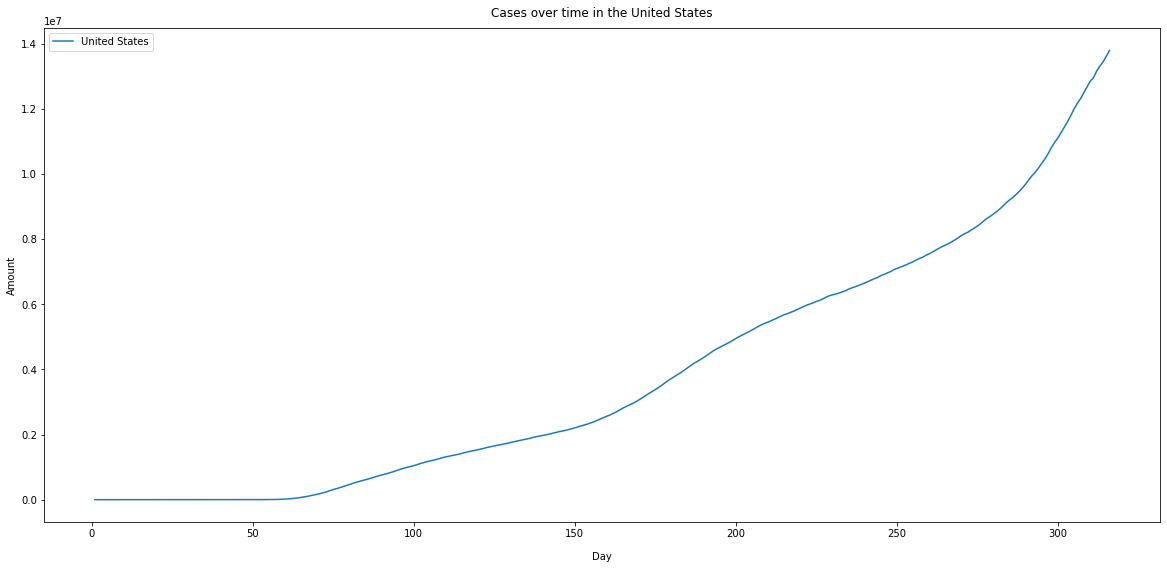

In [80]:
Trial_df1 = data.groupby(["day"]).sum()
x = []
y = []
l = 1
for row_index,row in Trial_df1.iterrows():
    x.append(l)
    y.append(row["cases"])
    l = l+1
fig6 = plt.figure(figsize =(20, 20))
ax = fig6.add_subplot(2,1,1)
ax.plot(x,y , label = "United States")
ax.legend()
ax.set_title('Cases over time in the United States',y=1.01)
ax.set_xlabel('Day')
ax.xaxis.set_label_coords(0.5, -0.06)
ax.set_ylabel('Amount')
fig7.show()

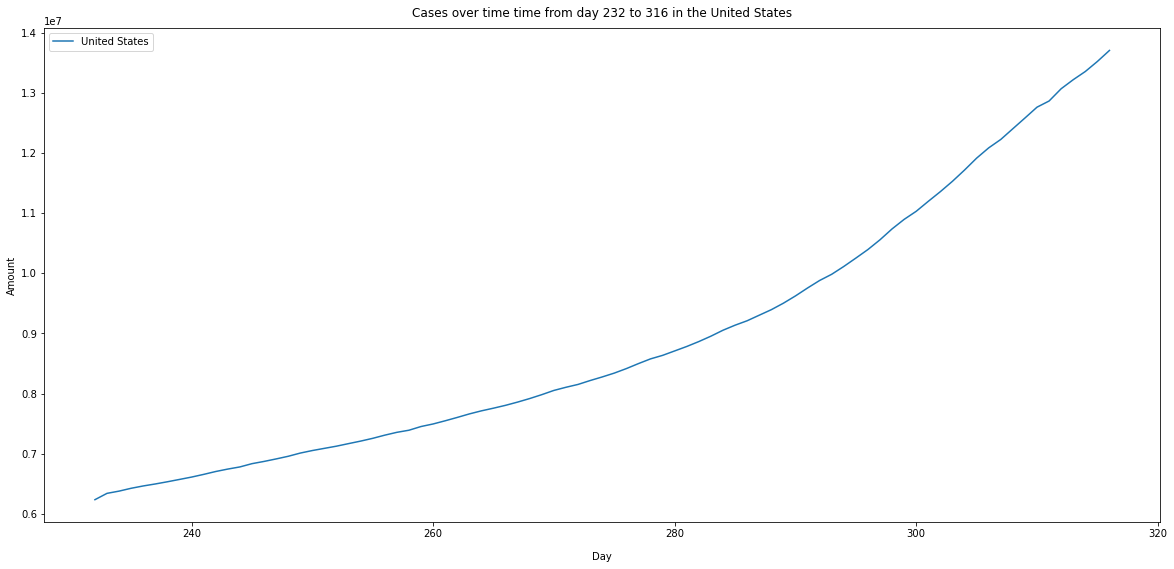

In [90]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
Trial_df = new_df.groupby(["day"]).sum()
x = []
y = []
Trial_df
l = 232
for row_index,row in Trial_df.iterrows():
    x.append(l)
    y.append(row["cases"])
    l = l+1
fig7 = plt.figure(figsize =(20, 20))
ax = fig7.add_subplot(2,1,1)
ax.plot(x,y , label = "United States")
ax.legend()
ax.set_title('Cases over time time from day 232 to 316 in the United States',y=1.01)
ax.set_xlabel('Day')
ax.xaxis.set_label_coords(0.5, -0.06)
ax.set_ylabel('Amount')
fig7.show()

### Mask Wearing over time
To show mask wearing over time I decided to use box plots. I could have used line plots but with 50 different states, the graph will look cluttered. Box plots show the changes over time but with a percentile-based system. This makes the data seem less cluttered. As shown in the graph, the mean of the graph has increased slightly over time. On day 231, it was around 85% while on day 301 it hovered around 90%. The top 25% has stayed relatively the same throughout the pandemic hovering around 90%-97%. However what surprising is that the lower 25% of states have dramatically increased over time. While a few states were between 60-70% on day 231, it increased to 70%-80% by day 301. This means the states which were reluctant have accepted mask wearing as a possible way to prevent covid.

To create the box plots, I used pandas bins. These bins are separated 10 days apart and show the average data from all 50 states over the course of those 10 days. This allows the data to remain uncluttered but can still show trends over time.


<ipython-input-98-b779c7c0f541>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  plotdata = np.array(pdata)


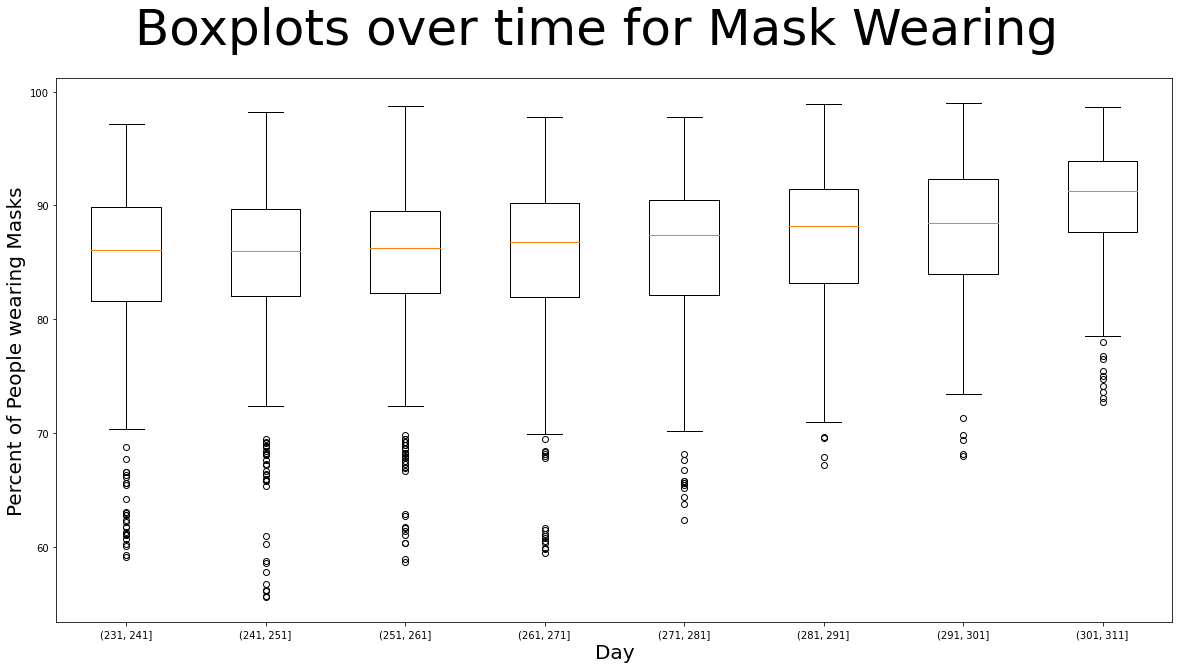

In [98]:
new_df["new_bin"] = pd.cut(x=new_df['day'], bins=[231,241,251,261,271,281,291,301,311,321])
pdata = []
for x in range(8):
    pdata.append([])
for row_index,row in new_df.iterrows():
    if str(row["new_bin"]) == "(231, 241]":
        pdata[0].append(row["value"])
    elif str(row["new_bin"]) == "(241, 251]":
        pdata[1].append(row["value"])
    elif str(row["new_bin"]) == "(251, 261]":
        pdata[2].append(row["value"])
    elif str(row["new_bin"]) == "(261, 271]":
        pdata[3].append(row["value"])
    elif str(row["new_bin"]) == "(271, 281]":
        pdata[4].append(row["value"])
    elif str(row["new_bin"]) == "(281, 291]":
        pdata[5].append(row["value"])
    elif str(row["new_bin"]) == "(291, 301]":
        pdata[6].append(row["value"])
    elif str(row["new_bin"]) == "(301, 311]":
        pdata[7].append(row["value"])
plotdata = np.array(pdata)
fig = plt.figure(figsize =(20, 10))
fig.suptitle("Boxplots over time for Mask Wearing",fontsize=50)
ax = fig.add_subplot(111)
ax.boxplot(plotdata)
ax.set_xlabel('Day',fontsize=20)
ax.set_ylabel('Percent of People wearing Masks',fontsize=20)
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8], minor=False)
ax.set_xticklabels(["(231, 241]","(241, 251]","(251, 261]", "(261, 271]","(271, 281]", "(281, 291]","(291, 301]","(301, 311]"],fontdict = None, minor = False)
plt.show()

### How effective is mask wearing
The most important question I tried to answer in this project starts with modifying our data table. To find how effective masks are we need to find the change of change per day. Since our graph is always increasing, we need to determine if the graph is concaving down, up or staying constant. The second derivative is used to determine the direction the graph is bending. If the graph has a positive second derivative, it means the graph is increasing exponentially. This means that every following more and more people are getting infected with covid. If the value is negative, this means that the rate of covid per day is decreasing. This means if the graph continues to have a negative second derivative, it will eventually reach 0 new cases per day. That would mean that covid has essentially been eliminated. So, having a negative second derivative means that masks make a significant difference to the point where it's slowly eliminating covid. If it stays constant (0) that means each day we have the same number of cases as the previous day. 

To create the second derivative, I use the slope formula again but this time I use the two rates we calculated earlier.
I created "Percent Rate of change of change" which is the second derivative of the percent and "Total Rate of change of change" which is the second derivative of the total cases per state.


In [110]:
pd.set_option("display.max_rows", 15, "display.max_columns", 30)
new_df["Percent Rate of change of change"] = list1 = [0] * 4329
new_df["Total Rate of change of change"] = list1 = [0] * 4329
for row_index,row in new_df.iterrows():    
    if(row["day"] < 313):
        result = new_df.loc[(new_df.day == (row["day"] + 1)) & (new_df.state == row["state"])]
        for row_index1,row1 in result.iterrows():
            new_df.loc[row_index, 'Percent Rate of change of change'] = row1["ratechange_percentage"] - row["ratechange_percentage"] 
            new_df.loc[row_index, 'Total Rate of change of change'] = row1["rate_totalpop"] - row["rate_totalpop"]
new_df

,date,state,cases,deaths,day,geo_value,value,stderr,sample_size,POPESTIMATE2019,pop_case,next_day_results,pop_case_next,rate_totalpop,ratechange_percentage,new_bin,Percent Rate of change of change,Total Rate of change of change
0,2020-09-08,Alabama,133606,2277,232,al,87.874513,1.706219,366.0096,4903185,0.027249,134417,0.027414,811,0.000165,"(231, 241]",-0.000022,-107
1,2020-09-08,Alaska,6670,39,232,ak,78.712871,4.093374,100.0000,731545,0.009118,6735,0.009207,65,0.000089,"(231, 241]",0.000016,12
2,2020-09-08,Arizona,206048,5221,232,az,86.713975,1.380068,604.8998,7278717,0.028308,206548,0.028377,500,0.000069,"(231, 241]",-0.000040,-288
3,2020-09-08,Arkansas,66757,917,232,ar,84.801745,2.388057,226.0004,3017804,0.022121,67255,0.022286,498,0.000165,"(231, 241]",-0.000030,-90
4,2020-09-08,California,746113,13843,232,ca,91.576645,0.545422,2593.0126,39512223,0.018883,749196,0.018961,3083,0.000078,"(231, 241]",0.000015,590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4324,2020-12-01,Virginia,240063,4093,316,va,93.483512,0.302289,6666.6111,8535519,0.028125,0,0.000000,-240063,-0.028125,"(311, 321]",0.000000,0
4325,2020-12-01,Washington,174969,2927,316,wa,94.978656,0.274661,6321.9645,7614893,0.022977,0,0.000000,-174969,-0.022977,"(311, 321]",0.000000,0
4326,2020-12-01,West Virginia,48818,758,316,wv,92.299342,0.573483,2161.1554,1792147,0.027240,0,0.000000,-48818,-0.027240,"(311, 321]",0.000000,0
4327,2020-12-01,Wisconsin,416365,3628,316,wi,90.283772,0.402008,5427.9781,5822434,0.071510,0,0.000000,-416365,-0.071510,"(311, 321]",0.000000,0


### Failed Graph
Below I plotted the mask percentage for the axis vs the second derivative for both total and percent. As shown in the scatter plot, the graph is all over the place showing no clear change. This is because as stated in the introduction there is a lot of variables in determining the effectiveness of masks. However, I realized that this point can be solved by using the average over the course of multiple days. A single day can have anomalies in data which can cause the graph to look like there is no correlation. The data also shows no clear correlation because of the variables. Mask wearing according to the CDC is best practiced with social distancing, quarantining, and staying at home when needed.

Overall, determining a way to calculate the day to day from mask wearing was unsuccessful. This means that I couldn’t calculate the percentage of people needed to wear masks to see daily changes to covid. As shown, covid changes are sporadic and need to use the averages of multiple days to show any changes.


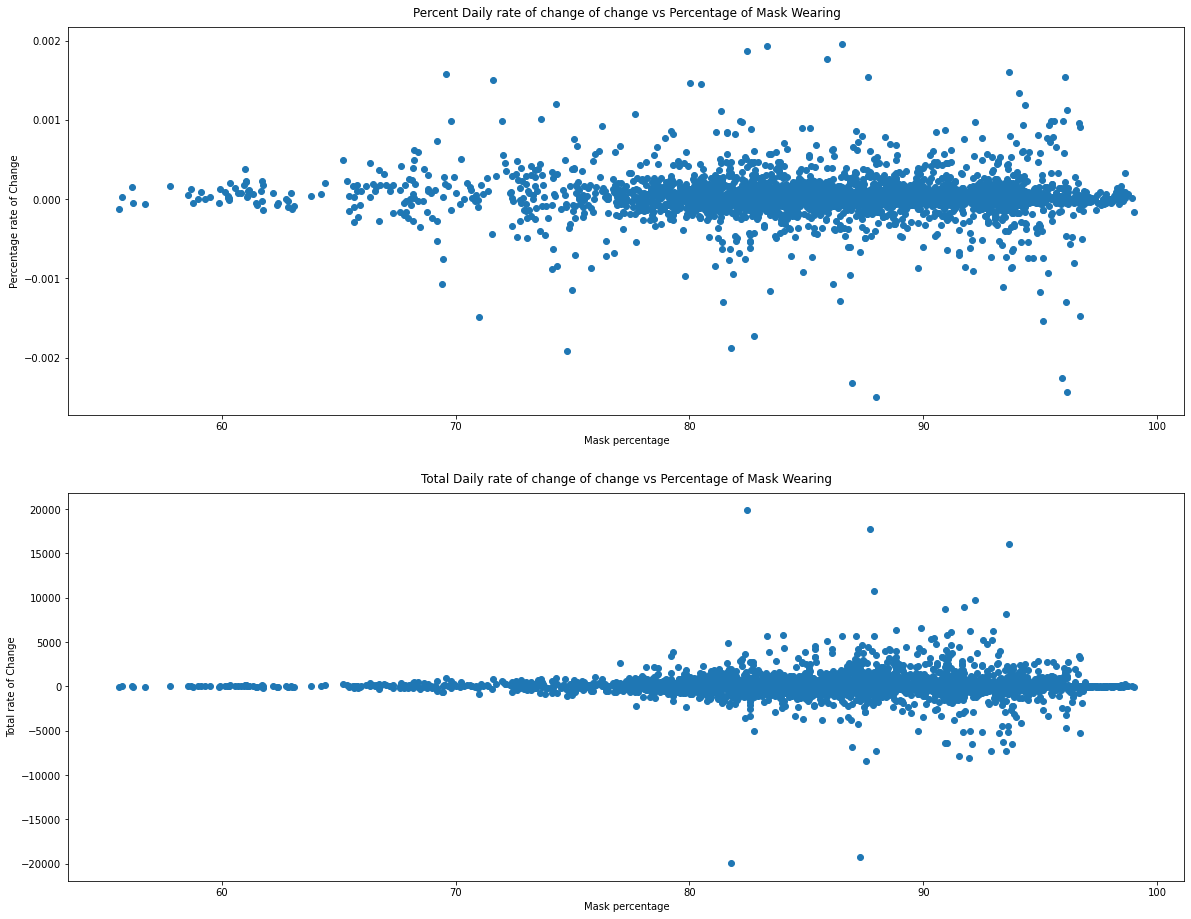

In [115]:
x_new =[]
y_new = []
x_total =[]
y_total =[]
pd.set_option("display.max_rows", 15, "display.max_columns", 30)
for row_index,row in new_df.iterrows():
    if(row["day"] < 313):
        x_new.append(row["value"])
        x_total.append((row["value"]))
        y_new.append(row["Percent Rate of change of change"])
        y_total.append(row["Total Rate of change of change"])
        
fig5 = plt.figure(figsize =(20, 50))
ax = fig5.add_subplot(6,1,1)

ax.scatter(x_new,y_new)
ax.set_title('Percent Daily rate of change of change vs Percentage of Mask Wearing',y=1.01)
ax.set_xlabel('Mask percentage')
ax.set_ylabel('Percentage rate of Change')

ax1 = fig5.add_subplot(6,1,2)
ax1.scatter(x_total,y_total)
ax1.set_title('Total Daily rate of change of change vs Percentage of Mask Wearing',y=1.01)
ax1.set_xlabel('Mask percentage')
ax1.set_ylabel('Total rate of Change')
plt.show()

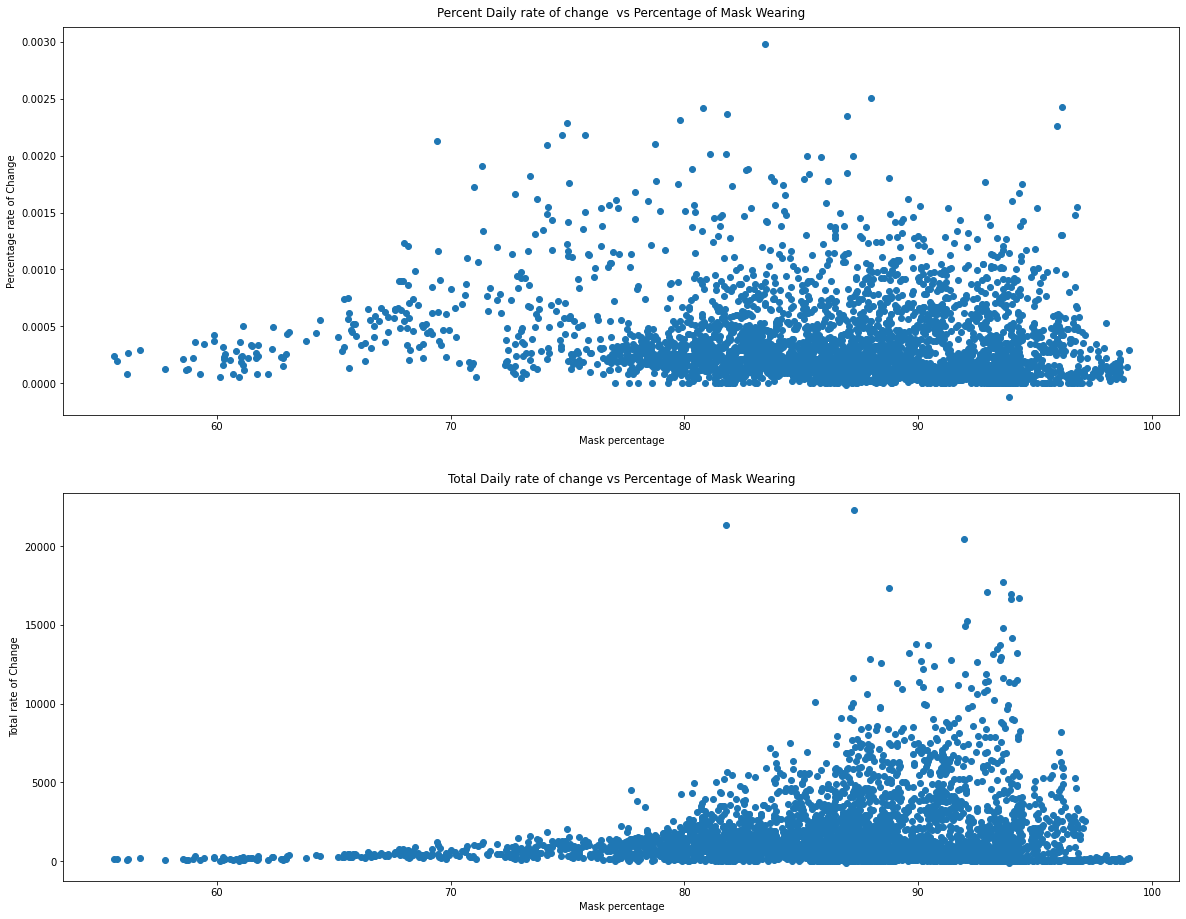

In [116]:
x_rate = []
y_rate = []
x_rate_total = []
y_rate_total = []
for row_index,row in new_df.iterrows():
    if(row["day"] < 313):
        x_rate.append(row["value"])
        x_rate_total.append((row["value"]))
        y_rate_total.append(row["rate_totalpop"])
        y_rate.append(row["ratechange_percentage"])
fig5 = plt.figure(figsize =(20, 50))
ax = fig5.add_subplot(6,1,1)

ax.scatter(x_rate,y_rate)
ax.set_title('Percent Daily rate of change  vs Percentage of Mask Wearing',y=1.01)
ax.set_xlabel('Mask percentage')
ax.set_ylabel('Percentage rate of Change')

ax1 = fig5.add_subplot(6,1,2)
ax1.scatter(x_rate_total,y_rate_total)
ax1.set_title('Total Daily rate of change vs Percentage of Mask Wearing',y=1.01)
ax1.set_xlabel('Mask percentage')
ax1.set_ylabel('Total rate of Change')
plt.show()

### Average per state
Below I grouped all the data by state and no longer take days into account. As shown above there seems to be no correlation between mask wearing and the day to day change for covid cases. However, when we no longer take days into account and instead show a difference in long term behavior due to masks a difference can be seen. While the lower graph which shows the second derivative of the total cases, still has no correlation. The upper graph which is the plot for percentage population's second derivative does have a correlation. Higher mask wearing does decrease the overall transmission of covid wearing. However, the data does show that no amount of mask wearing can eliminate covid or cause the second derivative to become negative besides the outlier of Hawaii.

To create the graph I first used a group by, to group the states together but when it compressed together I would take the mean of every single value. This allows for every state to have an average for percentage of wearing a mask and an average for the second derivative. I then plotted every value using a scatter graph.


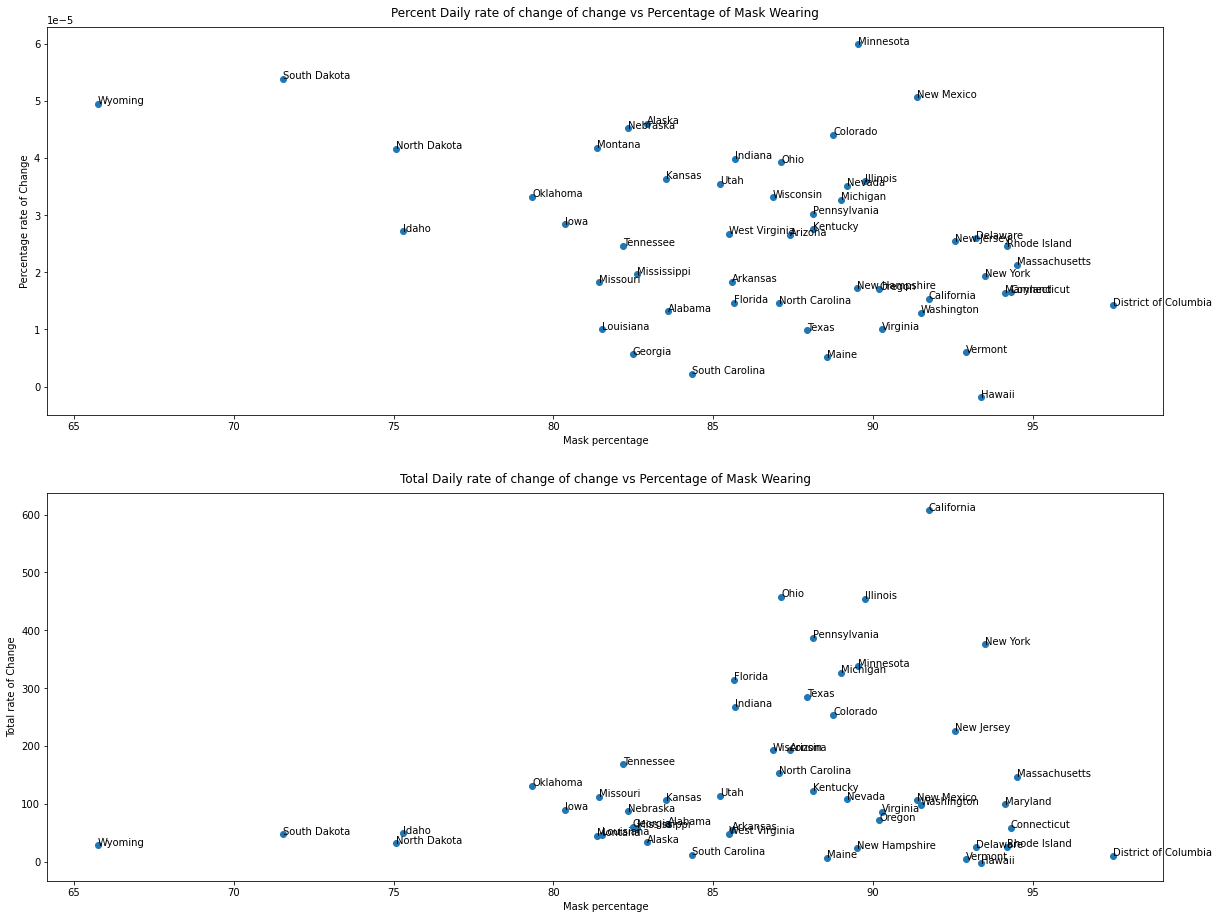

In [145]:
trial1 = new_df[new_df.day < 313]
Trial2df = trial1.groupby('state',group_keys = True).mean()
Trial2df
x_new =[]
y_new = []
x_total =[]
y_total =[]
key = []
pd.set_option("display.max_rows", 15, "display.max_columns", 30)
for row_index,row in Trial2df.iterrows():
    if(row["day"] < 313):
        x_new.append(row["value"])
        x_total.append((row["value"]))
        y_new.append(row["Percent Rate of change of change"])
        y_total.append(row["Total Rate of change of change"])
#        key.append(row)
key = list(Trial2df.index)
fig5 = plt.figure(figsize =(20, 50))
ax = fig5.add_subplot(6,1,1)
ax.scatter(x_new,y_new)
ax.set_title('Percent Daily rate of change of change vs Percentage of Mask Wearing',y=1.01)
ax.set_xlabel('Mask percentage')
ax.set_ylabel('Percentage rate of Change')

ax1 = fig5.add_subplot(6,1,2)
ax1.scatter(x_total,y_total)
ax1.set_title('Total Daily rate of change of change vs Percentage of Mask Wearing',y=1.01)
ax1.set_xlabel('Mask percentage')
ax1.set_ylabel('Total rate of Change')
g =0
for element in key:
    ax.annotate(element, (x_new[g],y_new[g]))
    ax1.annotate(element, (x_total[g],y_total[g]))
    g = g+1
plt.show()

### Linear Regression
Below I created a machine learning program with sklearn to determine the linear regression of the percent graph. The reason for using linear regression is because the scatter plot does follow a linear decline and It looks like the graph above has a correlation with mask wearing. The results I get below, show that wearing a mask does decrease the rate covid spreads. This is with a low error from the kfold test. However, the r2 score is extremely low. This means that the graph has very high variance from the line. My main guess is that if I include more preventative measures such as social distancing, interaction with people, over-state travel, etc. the variance should lower. This is because accounting for more variables will lower your data especially if you have many variables that is causing a dependence with each other.

In [136]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
X =[[]]
Y=[]
for row_index,row in Trial2df.iterrows():
    X.append([row["value"]])
    Y.append(row["Percent Rate of change of change"])
X.pop(0)
X
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Coefficients: \n', regr.coef_)
print("Yint:", regr.intercept_)
yg = regr.predict(X)
print("Mean squared error",mean_squared_error(Y, yg))
print("r2 score:",r2_score(Y, yg))

Coefficients: 
 [-9.12678284e-07]
Yint: 0.00010482267913079299
Mean squared error 1.7143309106227287e-10
r2 score: 0.15552213252180624


In [140]:
from sklearn.model_selection import KFold
X =[[]]
Y=[]
for row_index,row in Trial2df.iterrows():
    X.append([row["value"]])
    Y.append(row["Percent Rate of change of change"])
X.pop(0)
X = np.asarray(X)
Y = np.asarray(Y)
kfold = KFold(5, True, 1)
error = []
for train, test in kfold.split(X):
    regr = linear_model.LinearRegression()
    regr.fit(X[train], Y[train])
    predict = regr.predict(X[test])
    a = 0
    total = 0
    for n in range(len(predict)):
        xlo = predict[n] - Y[test][n]
        xlo = xlo * xlo
        xlo = xlo/2
        a = xlo + a
        total = total + 1
    g = a/total
    error.append(g)
sum = 0
for element in error:
    sum = element + sum
print("error:",sum/5)

error: 9.20841676584296e-11


/opt/conda/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


### FInal Graph
Below is my final graph to show the decrease of the rate of spread of covid-19 from wearing a mask

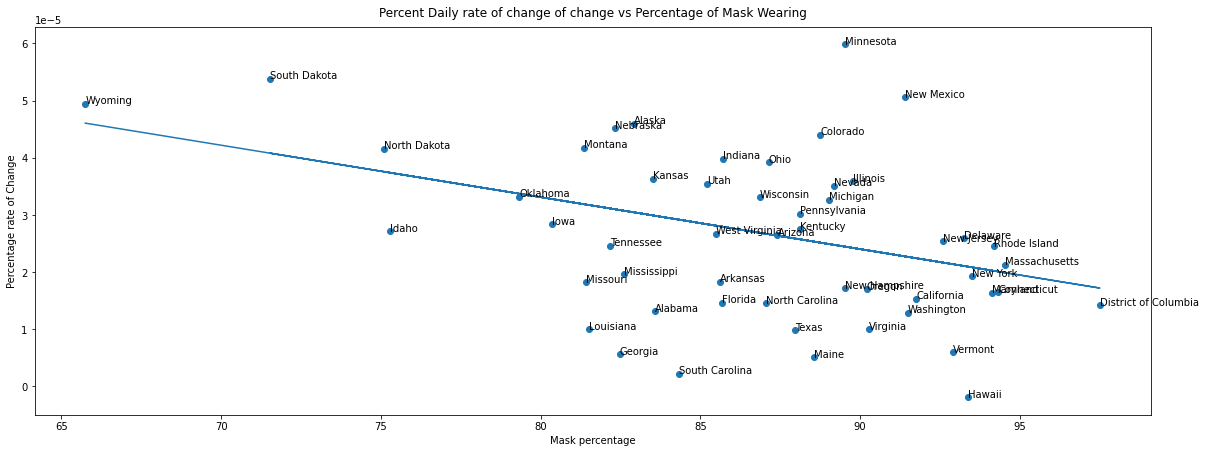

In [141]:
fig5 = plt.figure(figsize =(20, 50))
ax = fig5.add_subplot(6,1,1)
ax.scatter(x_new,y_new)
ax.set_title('Percent Daily rate of change of change vs Percentage of Mask Wearing',y=1.01)
ax.set_xlabel('Mask percentage')
ax.set_ylabel('Percentage rate of Change')
g =0
for element in key:
    ax.annotate(element, (x_new[g],y_new[g]))
    g =g+1
kop =[]
for element in x_new:
    kop.append(regr.coef_[0]*(element) + regr.intercept_)
ax.plot(x_new,kop)

## Conclusion:
Overall, wearing a mask is shown to show at least some impact in decreasing covid rates. It's still difficult to determine if this is the [only](https://www.cdc.gov/coronavirus/2019-ncov/prevent-getting-sick/index.html) reason why high wearing states have lower covid infections. One reason is that places that take covid more seriously will be more inclined to practice all covid-19 precautions. This is also not a scientific study where we have a control group to compare our results with. To have a proper procedure we need data from every state on the infection rate of those who wear masks and those who don't. Instead, our data makes broad generalizations on the effectiveness of masks. However, from the data that survey collected, it shows that over a long period of time there is some impact that masks have in reducing the spread of covid.